In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("diabetes_clean.csv")

In [3]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35     30.5  33.6   
1            1       85             66             29     30.5  26.6   
2            8      183             64             23     30.5  23.3   
3            1       89             66             23     94.0  28.1   
4            0      137             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
X = df.drop("Outcome", axis=1)   # semua kolom kecuali Outcome
y = df["Outcome"]                # target kolom

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
# Fit & transform hanya di data training
X_train = scaler.fit_transform(X_train)

# Transform data testing (pakai scaler yang sama!)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [10]:
# 1. Buat model Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)

In [11]:
# 2. Latih model dengan data training
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [12]:
# 3. Prediksi data testing
y_pred = model.predict(X_test)

In [13]:

# 4. Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Akurasi: 0.7077922077922078

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154


Confusion Matrix:
 [[82 18]
 [27 27]]


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [15]:
cm = confusion_matrix(y_test, y_pred)

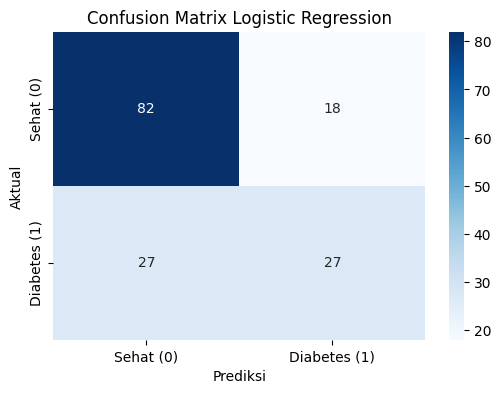

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Sehat (0)", "Diabetes (1)"], yticklabels=["Sehat (0)", "Diabetes (1)"])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix Logistic Regression")
plt.show()

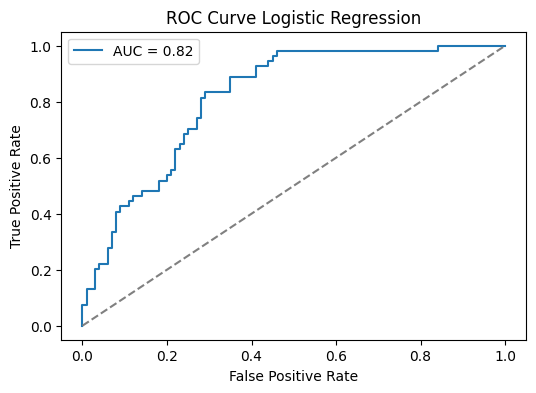

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

# 1. Prediksi probabilitas (bukan hasil 0/1, tapi peluang diabetes)
y_prob = model.predict_proba(X_test)[:, 1]

# 2. Hitung ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# 3. Plot ROC
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="AUC = %.2f" % auc)
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # garis random guess
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Logistic Regression")
plt.legend()
plt.show()

In [20]:
import joblib

# Simpan model logistic regression
joblib.dump(model, "logreg_model.pkl")

# Simpan juga scaler (biar data baru bisa diskalakan sama seperti training)
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']